In [7]:
pip install hmmlearn 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 29.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"].values.reshape(-1,1)

print("Total observations:", len(returns))
print("First 5 returns:\n", returns[:5])


Total observations: 1234
First 5 returns:
 [[-1.31095537e-02]
 [-1.24140703e-02]
 [ 5.38461967e-03]
 [ 5.53700257e-03]
 [-9.05136114e-05]]


In [10]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM

# Load returns
df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"].values.reshape(-1,1)

# Fit 3-state HMM
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(returns)

print("Transition Matrix:")
print(model.transmat_)

print("\nMeans of regimes:")
print(model.means_)

print("\nVariances of regimes:")
print(model.covars_)


Transition Matrix:
[[5.13155710e-04 9.97069070e-01 2.41777429e-03]
 [9.71729282e-01 3.76457225e-05 2.82330727e-02]
 [7.85477226e-04 2.33117513e-01 7.66097010e-01]]

Means of regimes:
[[ 0.00169411]
 [-0.00071282]
 [ 0.00519313]]

Variances of regimes:
[[[0.00020833]]

 [[0.00024527]]

 [[0.00278655]]]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

# Load data
df = pd.read_csv("reliance_returns.csv")
returns = df["Log_Return"].values.reshape(-1,1)

# Fit HMM again (Deepnote kernel resets each time)
model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000)
model.fit(returns)

# Decode regimes
hidden_states = model.predict(returns)

df["Regime"] = hidden_states

print(df.head())


         Date       Close        High         Low        Open    Volume  \
0  2019-01-02  491.998230  501.158723  489.596917  495.600156  15628818   
1  2019-01-03  485.928284  495.644616  484.749875  492.487362  16288287   
2  2019-01-04  488.551880  491.131062  480.747693  487.996041  18516544   
3  2019-01-07  491.264496  497.356669  489.596920  492.265036  12060290   
4  2019-01-08  491.220032  493.576848  487.373507  491.420134  12304389   

   Log_Return  Regime  
0   -0.013110       0  
1   -0.012414       0  
2    0.005385       0  
3    0.005537       0  
4   -0.000091       0  


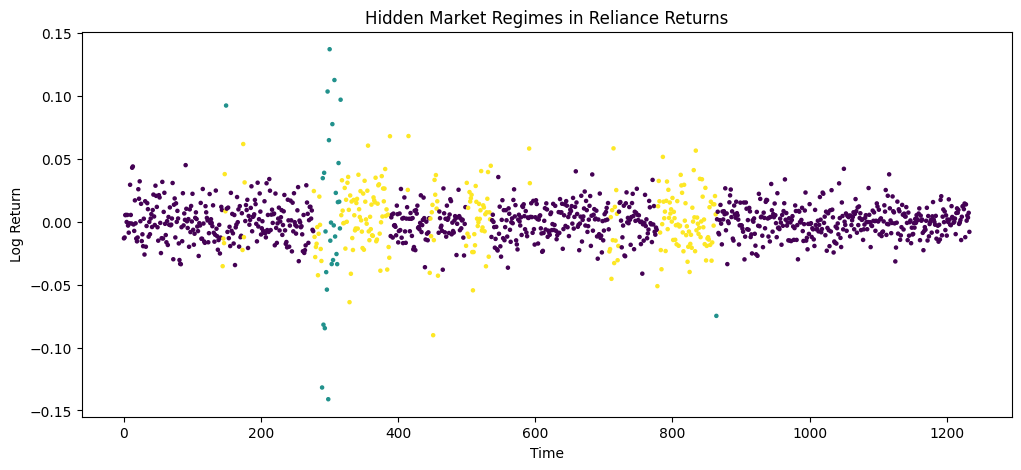

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(df.index, df["Log_Return"], c=df["Regime"], cmap="viridis", s=5)
plt.title("Hidden Market Regimes in Reliance Returns")
plt.xlabel("Time")
plt.ylabel("Log Return")
plt.show()


In [19]:
import numpy as np

for i in range(3):
    subset = df[df["Regime"] == i]["Log_Return"]
    print(f"\nRegime {i}")
    print("Mean:", subset.mean())
    print("Std Dev:", subset.std())
    print("Observations:", len(subset))



Regime 0
Mean: 0.00024406745991778476
Std Dev: 0.01304725117172019
Observations: 957

Regime 1
Mean: 0.0029365323884441674
Std Dev: 0.06990716315042174
Observations: 30

Regime 2
Mean: 0.0025250477580327554
Std Dev: 0.024198662742219334
Observations: 247


In [22]:
print("\nEstimated Transition Matrix:\n")
print(model.transmat_)



Estimated Transition Matrix:

[[9.79975633e-01 2.41151562e-04 1.97832151e-02]
 [8.52885340e-02 8.10366833e-01 1.04344633e-01]
 [5.36049060e-02 2.04149544e-02 9.25980140e-01]]


In [25]:
import numpy as np

alpha = 0.95

print("Regime-wise 95% VaR:\n")

for i in range(3):
    subset = df[df["Regime"] == i]["Log_Return"]
    VaR = -np.quantile(subset, 1 - alpha)
    print(f"Regime {i} VaR:", VaR)


Regime-wise 95% VaR:

Regime 0 VaR: 0.02057671333241491
Regime 1 VaR: 0.1104841098636461
Regime 2 VaR: 0.036974048394149105


In [28]:
df["Signal"] = 1
df.loc[df["Regime"] == 1, "Signal"] = 0   # Avoid crash regime

df["Strategy_Return"] = df["Signal"] * df["Log_Return"]

print("Normal Returns Mean:", df["Log_Return"].mean())
print("Strategy Returns Mean:", df["Strategy_Return"].mean())


Normal Returns Mean: 0.0007660902163928166
Strategy Returns Mean: 0.0006946996396883393


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f4e80ecd-af08-4c5a-8f0a-c8c46b34deb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>